<a href="https://colab.research.google.com/github/HABONIMANA/EXERCICE/blob/main/Exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Données de l'enquête
data = [
    [2, 2, 1, 4, 2], [1, 1, 2, 8, 11], [2, 2, 3, 2, 1], [1, 1, 2, 10, 11],
    [1, 2, 1, 7, 5], [1, 1, 3, 6, 7], [2, 2, 1, 4, 4], [1, 2, 1, 3, 1],
    [2, 2, 2, 3, 2], [1, 2, 1, 5, 7], [1, 1, 2, 7, 6], [1, 1, 3, 13, 17],
    [1, 1, 1, 6, 6], [2, 2, 1, 2, 2], [2, 2, 3, 7, 7], [1, 1, 2, 9, 11],
    [2, 2, 3, 1, 0], [1, 1, 1, 5, 5], [1, 2, 2, 4, 3], [1, 2, 2, 12, 13],
    [2, 2, 1, 4, 3], [1, 1, 3, 9, 7], [1, 1, 3, 3, 4], [2, 2, 3, 2, 3],
    [2, 2, 2, 5, 3], [1, 1, 1, 7, 9], [2, 2, 1, 7, 4], [1, 1, 2, 8, 7],
    [1, 1, 3, 6, 4], [2, 2, 3, 3, 4], [2, 1, 2, 10, 6], [1, 1, 1, 8, 7],
    [2, 1, 2, 4, 4], [1, 2, 2, 5, 5], [1, 1, 3, 3, 1], [2, 2, 1, 11, 9],
    [1, 1, 3, 9, 11], [1, 2, 1, 6, 8], [2, 2, 3, 2, 0], [1, 1, 2, 5, 7]
]

# Noms des colonnes (questions)
columns = ['q1', 'q2', 'q3', 'q4', 'q5']

# Création du DataFrame
df = pd.DataFrame(data, columns=columns)

# (Optionnel mais recommandé) Remplacer les codes numériques par des libellés clairs
df['q1_label'] = df['q1'].map({1: 'Rola Cola', 2: 'Koka Cola'})
df['q3_label'] = df['q3'].map({1: 'Oui (aime sucré)', 2: 'Indifférent', 3: 'Non (n\'aime pas sucré)'})


print("Aperçu des données chargées :")
print(df.head())

Aperçu des données chargées :
   q1  q2  q3  q4  q5   q1_label                q3_label
0   2   2   1   4   2  Koka Cola        Oui (aime sucré)
1   1   1   2   8  11  Rola Cola             Indifférent
2   2   2   3   2   1  Koka Cola  Non (n'aime pas sucré)
3   1   1   2  10  11  Rola Cola             Indifférent
4   1   2   1   7   5  Rola Cola        Oui (aime sucré)


In [ ]:
# Sélection des colonnes q1, q2, q3
df_q1_q2_q3 = df[['q1', 'q2', 'q3']]

# Affichage du résultat
print("Variables q1, q2, et q3 :")
print(df_q1_q2_q3)

Variables q1, q2, et q3 :
    q1  q2  q3
0    2   2   1
1    1   1   2
2    2   2   3
3    1   1   2
4    1   2   1
5    1   1   3
6    2   2   1
7    1   2   1
8    2   2   2
9    1   2   1
10   1   1   2
11   1   1   3
12   1   1   1
13   2   2   1
14   2   2   3
15   1   1   2
16   2   2   3
17   1   1   1
18   1   2   2
19   1   2   2
20   2   2   1
21   1   1   3
22   1   1   3
23   2   2   3
24   2   2   2
25   1   1   1
26   2   2   1
27   1   1   2
28   1   1   3
29   2   2   3
30   2   1   2
31   1   1   1
32   2   1   2
33   1   2   2
34   1   1   3
35   2   2   1
36   1   1   3
37   1   2   1
38   2   2   3
39   1   1   2


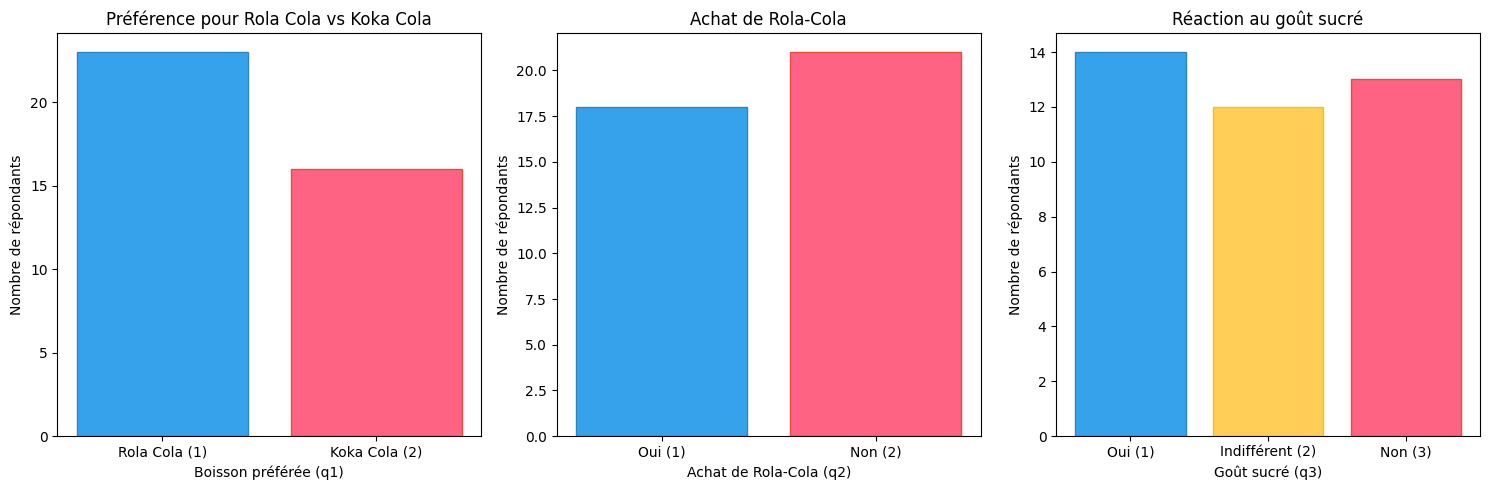

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Données brutes
data = [
    [2, 2, 1, 4, 2], [1, 1, 2, 8, 11], [2, 2, 3, 2, 1], [1, 1, 2, 10, 11], [1, 2, 1, 7, 5],
    [1, 1, 3, 6, 7], [2, 2, 1, 4, 4], [1, 2, 1, 3, 1], [2, 2, 2, 3, 2], [1, 2, 1, 5, 7],
    [1, 1, 2, 7, 6], [1, 1, 3, 13, 17], [1, 1, 1, 6, 6], [2, 2, 1, 2, 2], [2, 2, 3, 7, 7],
    [1, 1, 2, 9, 11], [2, 2, 3, 1, 0], [1, 1, 1, 5, 5], [1, 2, 2, 4, 3], [1, 2, 2, 12, 13],
    [2, 2, 1, 4, 3], [1, 1, 3, 9, 7], [1, 1, 3, 3, 4], [2, 2, 3, 2, 3], [2, 2, 2, 5, 3],
    [1, 1, 1, 7, 9], [2, 2, 1, 7, 4], [1, 1, 2, 8, 7], [1, 1, 3, 6, 4], [2, 2, 3, 3, 4],
    [2, 1, 2, 10, 6], [1, 1, 1, 8, 7], [2, 1, 2, 4, 4], [1, 2, 2, 5, 5], [1, 1, 3, 3, 1],
    [2, 2, 1, 11, 9], [1, 1, 3, 9, 11], [1, 2, 1, 6, 8], [2, 2, 3, 2, 0]
]

# Extraction des colonnes
q1 = [row[0] for row in data]
q2 = [row[1] for row in data]
q3 = [row[2] for row in data]

# Création de la grille de figures
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# q1 : Préférence de boisson
labels_q1 = ['Rola Cola (1)', 'Koka Cola (2)']
frequences_q1 = [q1.count(1), q1.count(2)]  # [22, 13]
axes[0].bar(labels_q1, frequences_q1, color=['#36A2EB', '#FF6384'], edgecolor=['#2E86C1', '#E74C3C'])
axes[0].set_title('Préférence pour Rola Cola vs Koka Cola')
axes[0].set_xlabel('Boisson préférée (q1)')
axes[0].set_ylabel('Nombre de répondants')

# q2 : Achat de Rola-Cola
labels_q2 = ['Oui (1)', 'Non (2)']
frequences_q2 = [q2.count(1), q2.count(2)]  # [20, 15]
axes[1].bar(labels_q2, frequences_q2, color=['#36A2EB', '#FF6384'], edgecolor=['#2E86C1', '#E74C3C'])
axes[1].set_title('Achat de Rola-Cola')
axes[1].set_xlabel('Achat de Rola-Cola (q2)')
axes[1].set_ylabel('Nombre de répondants')

# q3 : Goût sucré
labels_q3 = ['Oui (1)', 'Indifférent (2)', 'Non (3)']
frequences_q3 = [q3.count(1), q3.count(2), q3.count(3)]  # [11, 12, 12]
axes[2].bar(labels_q3, frequences_q3, color=['#36A2EB', '#FFCE56', '#FF6384'], edgecolor=['#2E86C1', '#F1C40F', '#E74C3C'])
axes[2].set_title('Réaction au goût sucré')
axes[2].set_xlabel('Goût sucré (q3)')
axes[2].set_ylabel('Nombre de répondants')

# Ajustement de la disposition
plt.tight_layout()
plt.show()

Table de contingence entre la boisson préférée (q1) et la préférence pour le sucre (q3) :
q3_label   Indifférent  Non (n'aime pas)  Oui (aime sucré)
q1_label                                                  
Koka Cola            4                 6                 6
Rola Cola            9                 7                 8


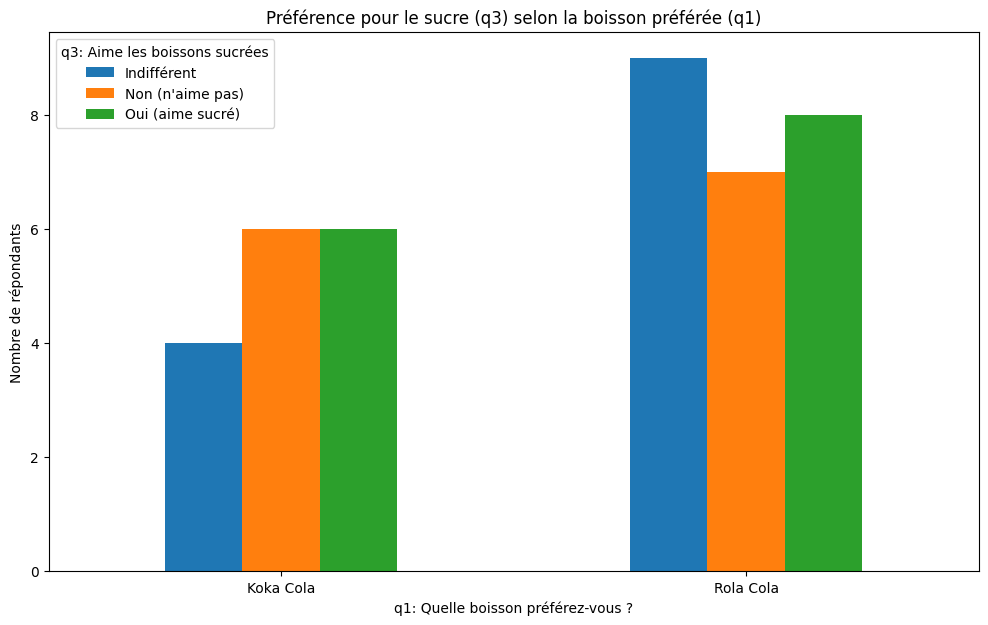

In [ ]:
# Création d'une table de contingence
contingency_table_q1_q3 = pd.crosstab(df['q1_label'], df['q3_label'])
print("Table de contingence entre la boisson préférée (q1) et la préférence pour le sucre (q3) :")
print(contingency_table_q1_q3)

# Visualisation avec un diagramme en barres groupées
contingency_table_q1_q3.plot(kind='bar', figsize=(12, 7))
plt.title('Préférence pour le sucre (q3) selon la boisson préférée (q1)')
plt.xlabel('q1: Quelle boisson préférez-vous ?')
plt.ylabel('Nombre de répondants')
plt.xticks(rotation=0)
plt.legend(title='q3: Aime les boissons sucrées')
plt.show()

Statistiques de la consommation de Cola (q4) par boisson préférée (q1) :
           count      mean       std  min  25%  50%   75%   max
q1_label                                                       
Koka Cola   16.0  4.437500  2.920474  1.0  2.0  4.0  5.50  11.0
Rola Cola   24.0  6.833333  2.648489  3.0  5.0  6.5  8.25  13.0


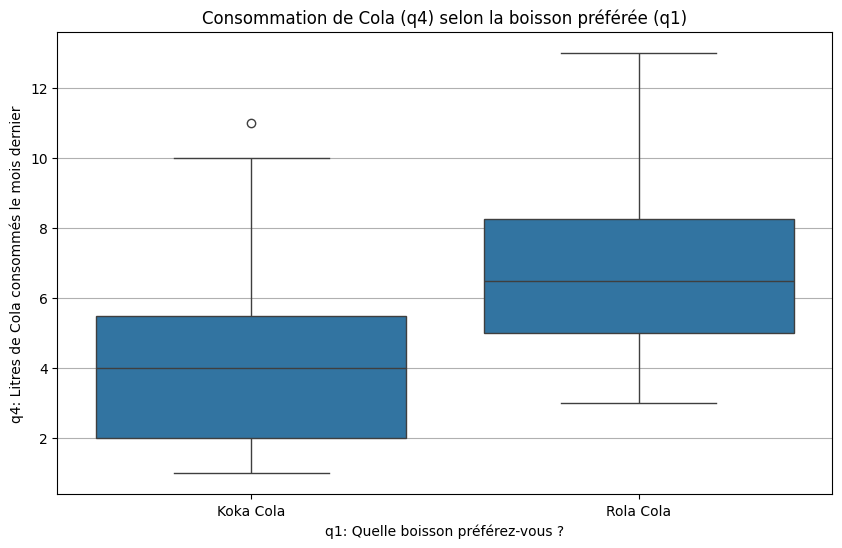

In [ ]:
# Calcul des statistiques descriptives de q4 groupées par q1
stats_q4_by_q1 = df.groupby('q1_label')['q4'].describe()
print("Statistiques de la consommation de Cola (q4) par boisson préférée (q1) :")
print(stats_q4_by_q1)


# Création d'un box plot pour visualiser la distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='q1_label', y='q4')
plt.title('Consommation de Cola (q4) selon la boisson préférée (q1)')
plt.xlabel('q1: Quelle boisson préférez-vous ?')
plt.ylabel('q4: Litres de Cola consommés le mois dernier')
plt.grid(axis='y')
plt.show()

Statistiques de la consommation de Cola (q4) par préférence pour le sucre (q3) :
                  count      mean       std  min  25%  50%  75%   max
q3_label                                                             
Indifférent        13.0  6.923077  2.812518  3.0  5.0  7.0  9.0  12.0
Non (n'aime pas)   13.0  5.076923  3.616203  1.0  2.0  3.0  7.0  13.0
Oui (aime sucré)   14.0  5.642857  2.307418  2.0  4.0  5.5  7.0  11.0


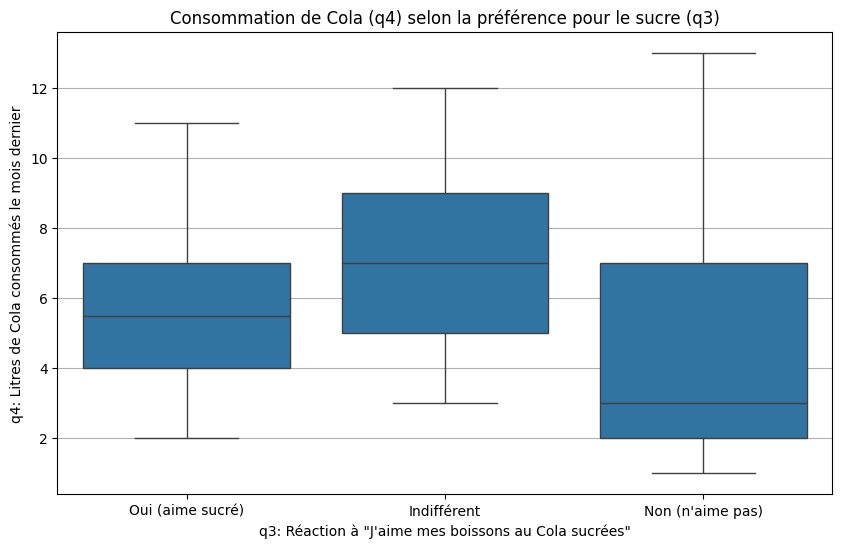

In [ ]:
# Calcul des statistiques descriptives de q4 groupées par q3
stats_q4_by_q3 = df.groupby('q3_label')['q4'].describe()
print("Statistiques de la consommation de Cola (q4) par préférence pour le sucre (q3) :")
print(stats_q4_by_q3)


# Création d'un box plot pour visualiser la distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='q3_label', y='q4')
plt.title('Consommation de Cola (q4) selon la préférence pour le sucre (q3)')
plt.xlabel('q3: Réaction à "J\'aime mes boissons au Cola sucrées"')
plt.ylabel('q4: Litres de Cola consommés le mois dernier')
plt.grid(axis='y')
plt.show()